### Malicious Website Analysis

* URL: it is the anonimous identification of the URL analyzed in the study
* URL_LENGTH: it is the number of characters in the URL
* NUMBER_SPECIAL_CHARACTERS: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=”
* CHARSET: it is a categorical value and its meaning is the character encoding standard (also called character set).
* SERVER: it is a categorical value and its meaning is the operative system of the server got from the packet response.
* CONTENT_LENGTH: it represents the content size of the HTTP header.
* WHOIS_COUNTRY: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).
* WHOIS_STATEPRO: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois).
* WHOIS_REGDATE: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM
* WHOIS_UPDATED_DATE: Through the Whois we got the last update date from the server analyzed
* TCP_CONVERSATION_EXCHANGE: This variable is the number of TCP packets exchanged between the server and our honeypot client
* DIST_REMOTE_TCP_PORT: it is the number of the ports detected and different to TCP
* REMOTE_IPS: this variable has the total number of IPs connected to the honeypot
* APP_BYTES: this is the number of bytes transfered
* SOURCE_APP_PACKETS: packets sent from the honeypot to the server
* REMOTE_APP_PACKETS: packets received from the server
* APP_PACKETS: this is the total number of IP packets generated during the communication between the honeypot and the server
* DNS_QUERY_TIMES: this is the number of DNS packets generated during the communication between the honeypot and the server
* TYPE: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites


__6 numerical and categorical variables below.__

__TYPE__: this is a categorical variable, its values represent the type of web page analyzed, specifically, 
1 is for malicious websites and 0 is for benign websites.

__URL_LENGTH__: it is the number of characters in the URL.

__CHARSET__: it is a categorical value and its meaning is the character encoding standard (also called character set).

__CONTENT_LENGTH__: it represents the content size of the HTTP header.

__APP_BYTES__: this is the number of bytes transfered

__SOURCE_APP_PACKETS__: packets sent from the honeypot to the server.

__REMOTE_APP_PACKETS__: packets received from the server.




In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Callable, List

class rawData:
    def __init__(self, filename):
        self.filename = filename
    @staticmethod    
    def validate(self):
        try:
            if self.filename.endswith('.csv') is True:
                return True
            else:
                return ("please make sure you have right file extension")
        except Exception as e:
               return e
    def readData(self):
        try:
            data = self.validate(self.filename)
            if(data):
                return pd.read_csv(self.filename)
            else:
                return ("your file is corrupted, please check your file")
        except Exception as e:
            return e
        
    
data = rawData('./dataset.csv')
init_dataFrame = pd.DataFrame(data.readData())


targetedVariables = pd.DataFrame(init_dataFrame[[
                                                "Type",
                                                "URL_LENGTH",
                                                "CHARSET",
                                                "CONTENT_LENGTH",
                                                "APP_BYTES",
                                                "SOURCE_APP_PACKETS",
                                                "REMOTE_APP_PACKETS"
                                                ]])



class AggregateFunctions:
    def __init__(self, data=None):
        self.data = data
    
    def isEmpty(self):
        return self.data.empty

    def getMean(self, c:str)-> str:
        if (self.isEmpty() == False):
            return(self.data[c].mean( skipna=True))
            
    def getMedian(self, c:str)-> str:
        if (self.isEmpty() == False):
              return(self.data[c].median( skipna=True))
            
    def getMin(self, c:str)-> str:
        if (self.isEmpty() == False):
              return(self.data[c].min( skipna=True))
            
    def getMax(self, c:str)-> str:
        if (self.isEmpty() == False):
              return(self.data[c].max( skipna=True))
            


    
            
#Samples from raw dataset ; first 100 rows 
init_dataFrame.head(100)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M0_75,27,7,UTF-8,Apache,193.0,US,PA,19/01/2015 0:00,3/03/2017 0:00,...,0,1,1838,11,13,4524,1992,11,2.0,1
96,B0_1209,27,8,UTF-8,nginx,NaN,US,WA,11/11/2015 0:00,13/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
97,B0_1353,27,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,CO,22/03/2017 0:00,23/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
98,B0_2085,27,6,utf-8,openresty/1.11.2.1,NaN,US,TEXAS,3/11/2009 0:00,4/03/2017 0:00,...,3,1,366,3,5,306,366,3,0.0,0


In [2]:
#Samples from selected variables ; first 100 rows 
targetedVariables.head(100)


,Type,URL_LENGTH,CHARSET,CONTENT_LENGTH,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS
0,1,16,iso-8859-1,263.0,700,9,10
1,0,16,UTF-8,15087.0,1230,17,19
2,0,16,us-ascii,324.0,0,0,0
3,0,17,ISO-8859-1,162.0,3812,39,37
4,0,17,UTF-8,124140.0,4278,61,62
...,...,...,...,...,...,...,...
95,1,27,UTF-8,193.0,1838,11,13
96,0,27,UTF-8,NaN,0,0,0
97,0,27,us-ascii,324.0,0,0,0
98,0,27,utf-8,NaN,366,3,5


In [3]:
#the summary statistics of the character columns.
init_dataFrame.describe(include=['object'])

,URL,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE
count,1781,1781,1780,1781,1781,1781,1781
unique,1781,9,239,49,182,891,594
top,B0_1305,UTF-8,Apache,US,CA,None,None
freq,1,676,386,1103,372,127,139


In [4]:
targetedVariables.describe(include=['object'])

,CHARSET
count,1781
unique,9
top,UTF-8
freq,676


In [5]:
#the summary statistics of all the columns.
init_dataFrame.describe(include='all')

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781,1781.000000,1781.000000,1781,1780,969.000000,1781,1781,1781,1781,...,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
unique,1781,NaN,NaN,9,239,NaN,49,182,891,594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B0_1305,NaN,NaN,UTF-8,Apache,NaN,US,CA,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,676,386,NaN,1103,372,127,139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,56.961258,11.111735,NaN,NaN,11726.927761,NaN,NaN,NaN,NaN,...,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,NaN,27.555586,4.549896,NaN,NaN,36391.809051,NaN,NaN,NaN,NaN,...,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,NaN,16.000000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,39.000000,8.000000,NaN,NaN,324.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,NaN,49.000000,10.000000,NaN,NaN,1853.000000,NaN,NaN,NaN,NaN,...,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,NaN,68.000000,13.000000,NaN,NaN,11323.000000,NaN,NaN,NaN,NaN,...,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000


In [6]:
targetedVariables.describe(include='all')

,Type,URL_LENGTH,CHARSET,CONTENT_LENGTH,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS
count,1781.000000,1781.000000,1781,969.000000,1.781000e+03,1781.000000,1781.000000
unique,NaN,NaN,9,NaN,NaN,NaN,NaN
top,NaN,NaN,UTF-8,NaN,NaN,NaN,NaN
freq,NaN,NaN,676,NaN,NaN,NaN,NaN
mean,0.121280,56.961258,NaN,11726.927761,2.982339e+03,18.540146,18.746210
std,0.326544,27.555586,NaN,36391.809051,5.605057e+04,41.627173,46.397969
min,0.000000,16.000000,NaN,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,39.000000,NaN,324.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,49.000000,NaN,1853.000000,6.720000e+02,8.000000,9.000000
75%,0.000000,68.000000,NaN,11323.000000,2.328000e+03,26.000000,25.000000


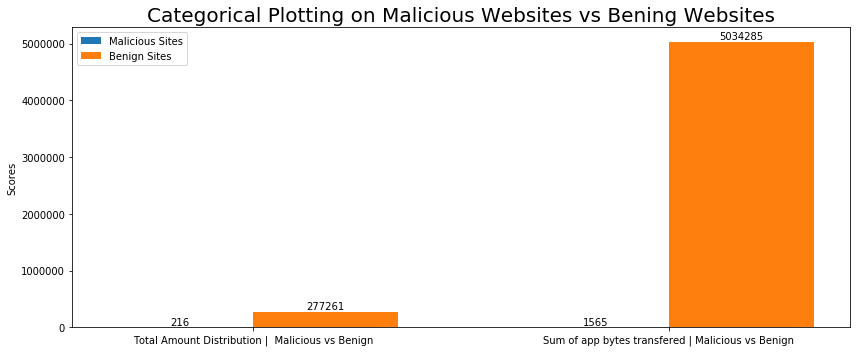

In [7]:
d = targetedVariables[["APP_BYTES","Type"]]
benignSites = list(filter(lambda x: x == 0, d.Type))
maliciousSites = list(filter(lambda x: x == 1, d.Type))
sumBenign = [] 
sumMalicious= []

for i in range(0, len(d)):
    if(d.Type[i] == 0):
        sumBenign.insert(i, d.APP_BYTES[i])

    else:
        sumMalicious.insert(i, d.APP_BYTES[i])
        

data = {
    'Malicious Sites': [
        len(maliciousSites), 
        sum(sumMalicious)], 
    'Benign Sites': [
        len(benignSites), 
        sum(sumBenign)
    ]
}

names = list(data.keys())
values = list(data.values()) 

labels = [names[0], names[1]]
m = [values[0][0], values[1][0]]
b = [values[0][1], values[1][1]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots( figsize=(12,5))
rects1 = ax.bar(x - width/2, m, width, label=names[0])
rects2 = ax.bar(x + width/2, b, width, label=names[1])


ax.set_ylabel('Scores')
ax.set_title('Categorical Plotting on Malicious Websites vs Bening Websites', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(["Total Amount Distribution |  Malicious vs Benign","Sum of app bytes transfered | Malicious vs Benign" ])
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='center')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()







Text(0.5, 0.98, 'Categorical Plotting by Country')

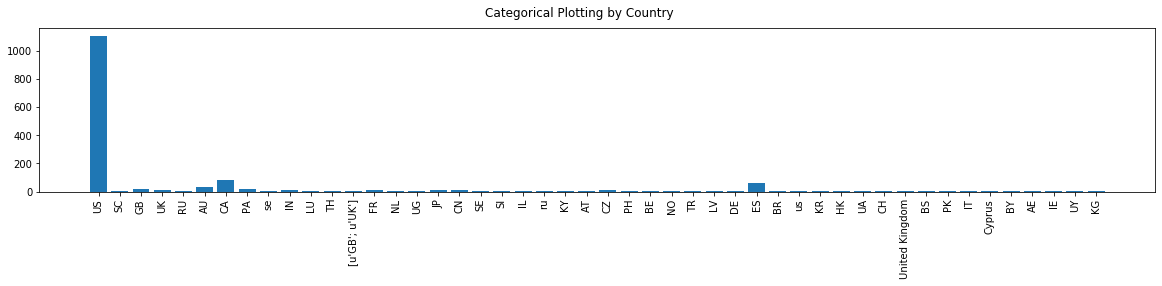

In [8]:
from collections import Counter
x = list(filter(lambda x: x != 'None', init_dataFrame.WHOIS_COUNTRY))
country_list=[k for k,v in Counter(x).items() if v > 1]

data = dict(Counter(x))
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(figsize=(20, 3))
plt.bar(names, values)
plt.xticks(rotation=90)
fig.suptitle('Categorical Plotting by Country')




Text(0.5, 0.98, 'Categorical Plotting CHARSET | URL_LENGTH')

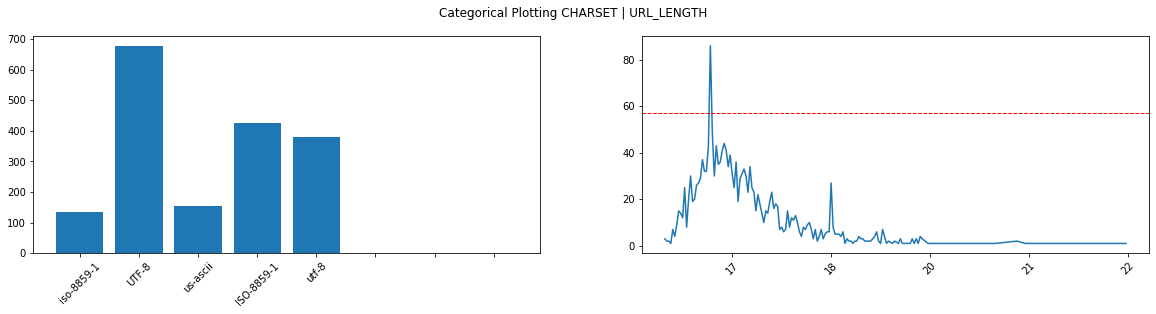

In [9]:

x = list(filter(lambda x: x != "nan" and x !=  "None", init_dataFrame.CHARSET))
Charset_list=[k for k,v in Counter(x).items() if v > 1]

y = list(filter(lambda x: x != "nan", init_dataFrame.URL_LENGTH))
URLLength_list=[k for k,v in Counter(y).items() if v > 1]


data = dict(Counter(x))
names = list(data.keys())
values = list(data.values())

data1 = dict(Counter(y))
names1 = list(data1.keys())
values1 = list(data1.values())

fig, axs = plt.subplots(1,2 ,figsize=(20, 4))

axs[0].bar(names, values)
axs[0].set_xticklabels(Charset_list, fontdict=None ,rotation=45)

axs[1].plot(names1, values1)
axs[1].axhline(init_dataFrame.URL_LENGTH.mean(), color='red', linestyle='dashed', linewidth=1, label="Average Length")
axs[1].set_xticklabels(URLLength_list, fontdict=None,  rotation=45)

fig.suptitle('Categorical Plotting CHARSET | URL_LENGTH')





In [10]:
# comparing the remote/source app transfer packages vs content length on Malicious
def compare(N):
    Sites = init_dataFrame.loc[init_dataFrame['Type'] == N]
    ds = AggregateFunctions(Sites)

    mean = ds.getMean("CONTENT_LENGTH")
    median = ds.getMedian("CONTENT_LENGTH")
    Max = ds.getMax("CONTENT_LENGTH")
    Min = ds.getMin("CONTENT_LENGTH")

    mean2 = ds.getMean("REMOTE_APP_PACKETS")
    median2 = ds.getMedian("REMOTE_APP_PACKETS")
    Max2 = ds.getMax("REMOTE_APP_PACKETS")
    Min2 = ds.getMin("REMOTE_APP_PACKETS")

    mean3 = ds.getMean("SOURCE_APP_PACKETS")
    median3 = ds.getMedian("SOURCE_APP_PACKETS")
    Max3 = ds.getMax("SOURCE_APP_PACKETS")
    Min3 = ds.getMin("SOURCE_APP_PACKETS")

    data= {"Mean":[mean, mean2, mean3], "Median": [median, median2, median3], "Max":[Max, Max2, Max3], "Min":[Min, Min2, Min3]}
    df = pd.DataFrame(data, index=["CONTENT_LENGTH","REMOTE_APP_PACKETS","SOURCE_APP_PACKETS"])
    return df






,Mean,Median,Max,Min
CONTENT_LENGTH,12885.064890,3020.0,649263.0,0.0
REMOTE_APP_PACKETS,19.313099,8.0,1284.0,0.0
SOURCE_APP_PACKETS,19.072204,8.0,1198.0,0.0


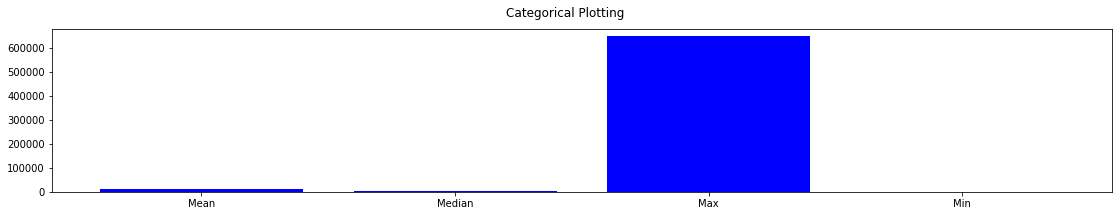

In [11]:
#Benign Web Sites
names = ['Mean', 'Median', 'Max', 'Min']
values = compare(0).values
fig, axs = plt.subplots(figsize=(19, 3), sharey=True)
axs.bar(names, values[0], color="Blue")
fig.suptitle('Categorical Plotting')
compare(0)

,Mean,Median,Max,Min
CONTENT_LENGTH,2297.943396,653.5,27103.0,58.0
REMOTE_APP_PACKETS,14.638889,10.0,216.0,1.0
SOURCE_APP_PACKETS,14.685185,11.0,228.0,0.0


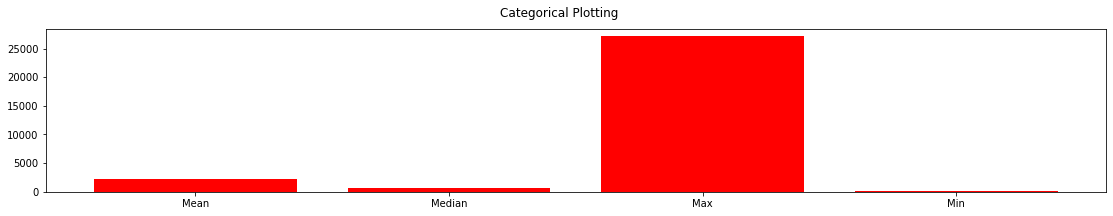

In [25]:
#Malicious Web Sites
names = ['Mean', 'Median', 'Max', 'Min']
values = compare(1).values
fig, axs = plt.subplots(figsize=(19, 3), sharey=True)
axs.bar(names, values[0], color="red")
fig.suptitle('Categorical Plotting')

compare(1)


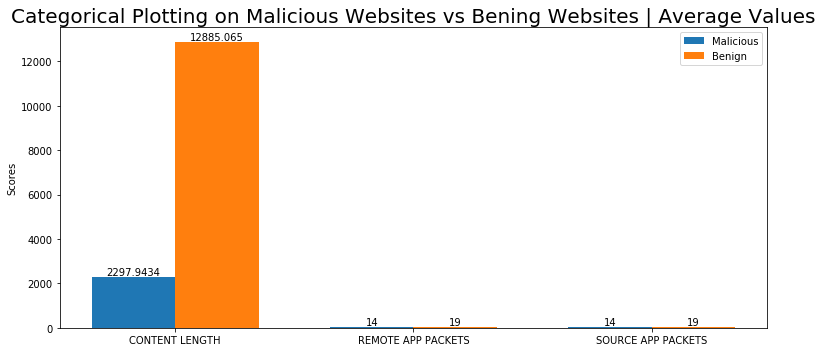

In [57]:
from decimal import *
getcontext()
Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999999, Emax=999999999,
        capitals=1, flags=[], traps=[Overflow, DivisionByZero,
        InvalidOperation])

getcontext().prec = 8

labels = ["Malicious", "Benign",""]

m = [Decimal(compare(1).loc["CONTENT_LENGTH", "Mean"]), 
     Decimal(compare(1).loc["REMOTE_APP_PACKETS", "Mean"]),
     Decimal(compare(1).loc["SOURCE_APP_PACKETS", "Mean"])]

b = [Decimal(compare(0).loc["CONTENT_LENGTH", "Mean"]), 
     Decimal(compare(0).loc["REMOTE_APP_PACKETS", "Mean"]),
     Decimal(compare(0).loc["SOURCE_APP_PACKETS", "Mean"])]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots( figsize=(12,5))
rects1 = ax.bar(x - width/2, m, width, label=labels[0])
rects2 = ax.bar(x + width/2, b, width, label=labels[1])



ax.set_ylabel('Scores')
ax.set_title('Categorical Plotting on Malicious Websites vs Bening Websites | Average Values', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(["CONTENT LENGTH","REMOTE APP PACKETS", "SOURCE APP PACKETS" ])
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='center')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

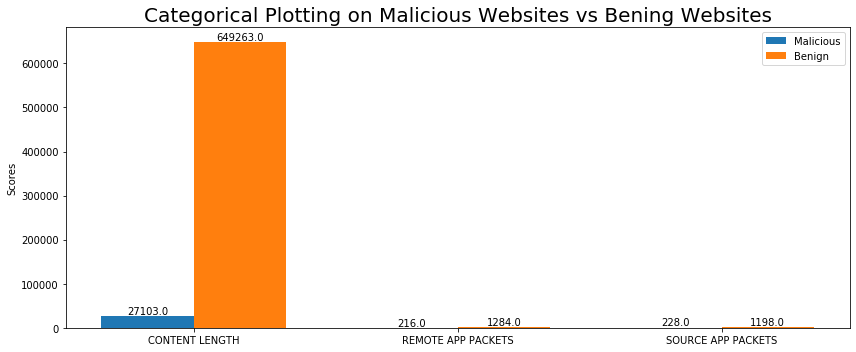

In [46]:
labels = ["Malicious", "Benign",""]

m = [compare(1).loc["CONTENT_LENGTH", "Max"], 
     compare(1).loc["REMOTE_APP_PACKETS", "Max"],
     compare(1).loc["SOURCE_APP_PACKETS", "Max"]]

b = [compare(0).loc["CONTENT_LENGTH", "Max"], 
     compare(0).loc["REMOTE_APP_PACKETS", "Max"],
     compare(0).loc["SOURCE_APP_PACKETS", "Max"]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots( figsize=(12,5))
rects1 = ax.bar(x - width/2, m, width, label=labels[0])
rects2 = ax.bar(x + width/2, b, width, label=labels[1])



ax.set_ylabel('Scores')
ax.set_title('Categorical Plotting on Malicious Websites vs Bening Websites | Max Values', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(["CONTENT LENGTH","REMOTE APP PACKETS", "SOURCE APP PACKETS" ])
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='center')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()